In [1]:
%matplotlib inline

from ultralytics import YOLO
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import numpy as np

In [2]:
# Load the trained YOLO model
model = YOLO('runs/detect/yolo_training/weights/best.pt')

In [3]:
def displayPerformanceFigures(real, pred, title, includeCF=True):
    """
    Display performance metrics and confusion matrix for classification results.
    
    Parameters:
    - real: True labels
    - pred: Predicted labels
    - title: Title for the plots
    - includeCF: Whether to include confusion matrix visualization
    """
    if includeCF:
        # Compute confusion matrix
        cm = confusion_matrix(real, pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted labels')
        plt.ylabel('True labels')
        plt.title('Confusion Matrix for ' + title + ' samples')
        plt.show() 

    acc = accuracy_score(real, pred)
    print("Accuracy: ", acc)
    
    f1 = f1_score(real, pred, average='macro')
    print("F1 Score: ", f1)


def plotTrainingHistory(history):
    """
    Plot training history from YOLO model results.
    
    Parameters:
    - history: Training history object or results path
    """
    # Create a figure and a set of subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    
    # Plot training and validation loss on the first subplot
    ax1.plot(history.history['loss'], label='train')
    ax1.plot(history.history['val_loss'], label='val')
    ax1.set_title('Model Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Loss')
    ax1.legend()
    
    # Plot training and validation accuracy on the second subplot
    ax2.plot(history.history['accuracy'], label='train')
    ax2.plot(history.history['val_accuracy'], label='val')
    ax2.set_title('Model Accuracy')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Accuracy')
    ax2.legend()
    
    # Improve layout to prevent overlap
    plt.tight_layout()
    
    # Display the plot
    plt.show()

In [4]:
# Validate the model on the validation set
results = model.val(data='yolo_dataset/dataset.yaml', save=False, plots=True)

Ultralytics 8.3.228  Python-3.11.4 torch-2.5.1+cu124 CUDA:0 (NVIDIA GeForce RTX 4060 Ti, 16380MiB)
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
YOLO11m summary (fused): 125 layers, 20,030,803 parameters, 0 gradients, 67.6 GFLOPs
val: Fast image access  (ping: 0.00.0 ms, read: 2522.01133.5 MB/s, size: 221.1 KB)
val: Scanning C:\Users\furqu\OneDrive - UC Leuven-Limburg\Third year\Projects\Gassy\gass_GASSY\DBNet\yolo_dataset\val\labels.cache... 62 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 62/62 62.2Kit/s 0.0s
val: Fast image access  (ping: 0.00.0 ms, read: 2522.01133.5 MB/s, size: 221.1 KB)
val: Scanning C:\Users\furqu\OneDrive - UC Leuven-Limburg\Third year\Projects\Gassy\gass_GASSY\DBNet\yolo_dataset\val\labels.cache... 62 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 62/62 62.2Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 4/4 2.0it/s 2.0s0.5ss
               

In [5]:
# Display key performance metrics
print("=" * 50)
print("YOLO Model Performance Metrics")
print("=" * 50)
print(f"mAP50: {results.box.map50:.4f}")
print(f"mAP50-95: {results.box.map:.4f}")
print(f"Precision: {results.box.mp:.4f}")
print(f"Recall: {results.box.mr:.4f}")
print("=" * 50)

YOLO Model Performance Metrics
mAP50: 0.8503
mAP50-95: 0.5819
Precision: 0.8560
Recall: 0.8254


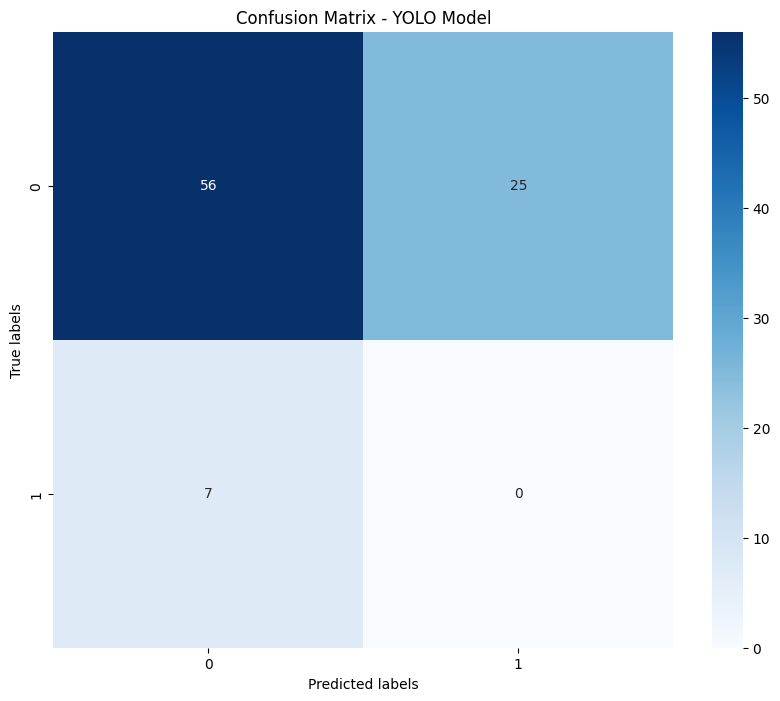

In [6]:
# Display the confusion matrix
if hasattr(results, 'confusion_matrix') and results.confusion_matrix is not None:
    cm = results.confusion_matrix.matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix - YOLO Model')
    plt.show()
else:
    print("Confusion matrix not available in results")

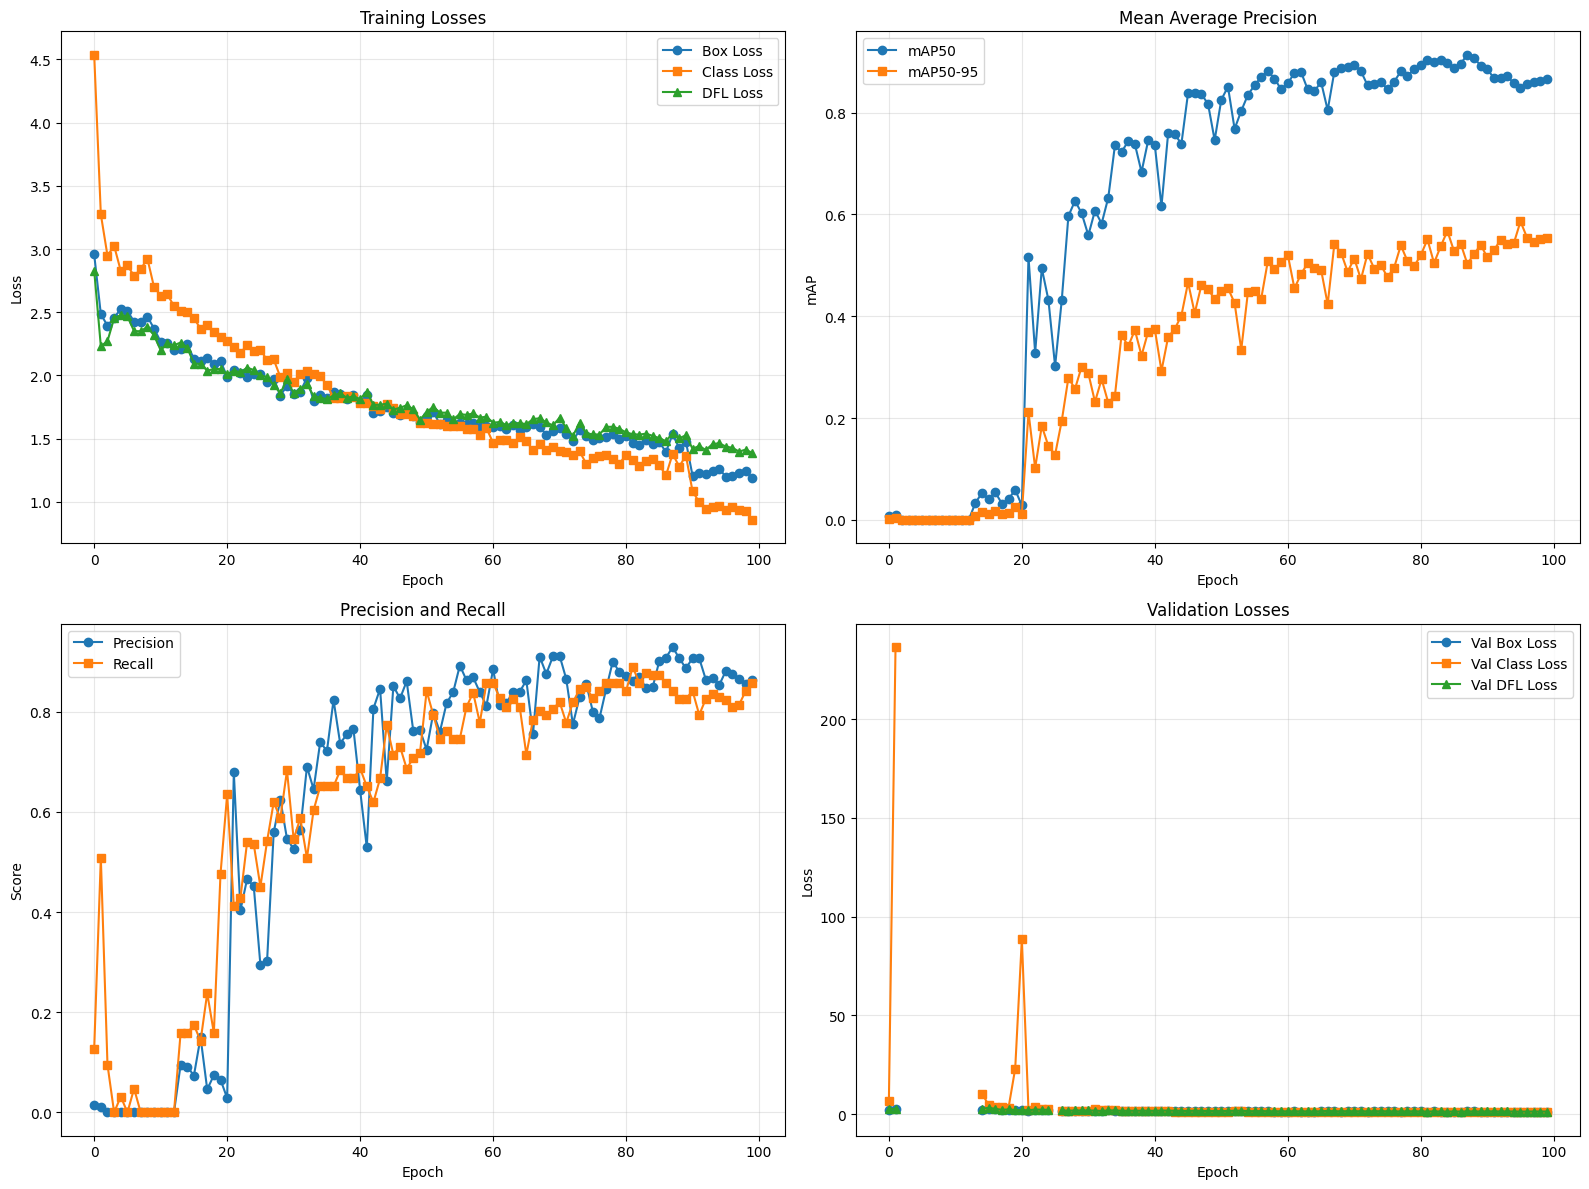

In [7]:
# Plot training results (metrics over epochs)
# YOLO saves training results in the training directory
import pandas as pd
import os

results_csv = 'runs/detect/yolo_training/results.csv'
if os.path.exists(results_csv):
    df = pd.read_csv(results_csv)
    df.columns = df.columns.str.strip()  # Remove leading/trailing spaces
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Plot losses
    axes[0, 0].plot(df.index, df['train/box_loss'], label='Box Loss', marker='o')
    axes[0, 0].plot(df.index, df['train/cls_loss'], label='Class Loss', marker='s')
    axes[0, 0].plot(df.index, df['train/dfl_loss'], label='DFL Loss', marker='^')
    axes[0, 0].set_title('Training Losses')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)
    
    # Plot mAP metrics
    axes[0, 1].plot(df.index, df['metrics/mAP50(B)'], label='mAP50', marker='o')
    axes[0, 1].plot(df.index, df['metrics/mAP50-95(B)'], label='mAP50-95', marker='s')
    axes[0, 1].set_title('Mean Average Precision')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('mAP')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)
    
    # Plot Precision and Recall
    axes[1, 0].plot(df.index, df['metrics/precision(B)'], label='Precision', marker='o')
    axes[1, 0].plot(df.index, df['metrics/recall(B)'], label='Recall', marker='s')
    axes[1, 0].set_title('Precision and Recall')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Score')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)
    
    # Plot validation losses
    if 'val/box_loss' in df.columns:
        axes[1, 1].plot(df.index, df['val/box_loss'], label='Val Box Loss', marker='o')
        axes[1, 1].plot(df.index, df['val/cls_loss'], label='Val Class Loss', marker='s')
        axes[1, 1].plot(df.index, df['val/dfl_loss'], label='Val DFL Loss', marker='^')
        axes[1, 1].set_title('Validation Losses')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Loss')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print(f"Results file not found at {results_csv}")